In [1]:
import re
import pandas as pd
import glob
import MeCab
from collections import Counter


title_list = []
author_list = []
text_list = []
text_count = []

columns = ["author", "title", "text", "count"]
values = [title_list, author_list, text_list, text_count]

# ファイルの読み込み
files = glob.glob("./books/*")
for file in files:

    with open(file) as h:
        lines = h.readlines()
        title = lines[0]
        title = re.sub('\n', '', title)
        author = lines[1]
        author = re.sub('\n', '', author)
        author = re.sub('\u3000', '', author)
        title_list.append(title)
        author_list.append(author)

    with open(file) as f:
        text = f.read()
        # ヘッダーの除去
        text = re.split('\-{5,}', text)[2]
        # フッタの除去
        text = re.split('底本：', text)[0]
        # 最初の一の除去
        text = re.sub('一', '', text, 1)
        # ふりがなの削除
        text = re.sub('《.+?》', '', text)
        # 入力注の削除
        text = re.sub('［＃.+?］', '', text)
        # 空行の削除
        text = re.sub('\n\n', '\n', text)
        text = re.sub('\u3000', '\n', text)
        text_list.append(text)
        text_count.append(len(text))

print(title_list)
print(author_list)
print(text_list)


['坊っちゃん', 'はつ恋', 'ヴェニスに死す']
['夏目漱石', 'ツルゲーネフ', 'トオマス・マンThomas Mann']
['\n\n\n親譲りの無鉄砲で小供の時から損ばかりしている。小学校に居る時分学校の二階から飛び降りて一週間ほど腰を抜かした事がある。なぜそんな無闇をしたと聞く人があるかも知れぬ。別段深い理由でもない。新築の二階から首を出していたら、同級生の一人が冗談に、いくら威張っても、そこから飛び降りる事は出来まい。弱虫やーい。と囃したからである。小使に負ぶさって帰って来た時、おやじが大きな眼をして二階ぐらいから飛び降りて腰を抜かす奴があるかと云ったから、この次は抜かさずに飛んで見せますと答えた。\n\n親類のものから西洋製のナイフを貰って奇麗な刃を日に翳して、友達に見せていたら、一人が光る事は光るが切れそうもないと云った。切れぬ事があるか、何でも切ってみせると受け合った。そんなら君の指を切ってみろと注文したから、何だ指ぐらいこの通りだと右の手の親指の甲をはすに切り込んだ。幸ナイフが小さいのと、親指の骨が堅かったので、今だに親指は手に付いている。しかし創痕は死ぬまで消えぬ。\n\n庭を東へ二十歩に行き尽すと、南上がりにいささかばかりの菜園があって、真中に栗の木が一本立っている。これは命より大事な栗だ。実の熟する時分は起き抜けに背戸を出て落ちた奴を拾ってきて、学校で食う。菜園の西側が山城屋という質屋の庭続きで、この質屋に勘太郎という十三四の倅が居た。勘太郎は無論弱虫である。弱虫の癖に四つ目垣を乗りこえて、栗を盗みにくる。ある日の夕方｜折戸の蔭に隠れて、とうとう勘太郎を捕まえてやった。その時勘太郎は逃げ路を失って、一生懸命に飛びかかってきた。向うは二つばかり年上である。弱虫だが力は強い。鉢の開いた頭を、こっちの胸へ宛ててぐいぐい押した拍子に、勘太郎の頭がすべって、おれの袷の袖の中にはいった。邪魔になって手が使えぬから、無暗に手を振ったら、袖の中にある勘太郎の頭が、右左へぐらぐら靡いた。しまいに苦しがって袖の中から、おれの二の腕へ食い付いた。痛かったから勘太郎を垣根へ押しつけておいて、足搦をかけて向うへ倒してやった。山城屋の地面は菜園より六尺がた低い。勘太郎は四つ目垣を半分｜崩して、自分の領分へ真逆様に落ちて、ぐうと云った。勘太郎が落ちるときに、お

In [2]:
df = pd.DataFrame()

for i, column in enumerate(columns):
    for value in values:
        df[column] = values[i]

df

,author,title,text,count
0,坊っちゃん,夏目漱石,\n\n\n親譲りの無鉄砲で小供の時から損ばかりしている。小学校に居る時分学校の二階から飛び...,89093
1,はつ恋,ツルゲーネフ,\n\n\nＰ・Ｖ・アンネンコフに捧げる\n\n\n\n客はもうとうに散ってしまった。時計が...,75114
2,ヴェニスに死す,トオマス・マンThomas Mann,\n第章\n\nグスタアフ・アッシェンバッハ――または、かれの五十回目の誕生日以来、かれの名...,83831


In [3]:
# MeCabで形態素解析
tagger = MeCab.Tagger("-Ochasen")

word_top = []

for text in list(df["text"]):

    result = tagger.parse(text)
    result_lines = result.split('\n')

    result_words = []
    words = []

    for result_line in result_lines:
        result_words.append(re.split('[\t,]', result_line))

    for result_word in result_words:
        if (result_word[0] not in ('EOS', '') and result_word[3] == '名詞-一般'):
            words.append(result_word[0])

    # 頻出単語TOP10を抽出
    counter = Counter(words)
    text_group = []
    for word, count in counter.most_common(10):
        add_word = '%s : %s' % (word, count)
        text_group.append(add_word)

    word_top.append(text_group)

df["word_ranking"] = word_top
df

,author,title,text,count,word_ranking
0,坊っちゃん,夏目漱石,\n\n\n親譲りの無鉄砲で小供の時から損ばかりしている。小学校に居る時分学校の二階から飛び...,89093,"[赤 : 178, シャツ : 170, 山嵐 : 155, 人 : 91, 学校 : 90..."
1,はつ恋,ツルゲーネフ,\n\n\nＰ・Ｖ・アンネンコフに捧げる\n\n\n\n客はもうとうに散ってしまった。時計が...,75114,"[父 : 159, ジナイーダ : 142, 顔 : 96, 自分 : 94, 人 : 77..."
2,ヴェニスに死す,トオマス・マンThomas Mann,\n第章\n\nグスタアフ・アッシェンバッハ――または、かれの五十回目の誕生日以来、かれの名...,83831,"[自分 : 146, アッシェンバッハ : 114, 男 : 99, 目 : 70, 少年 ..."


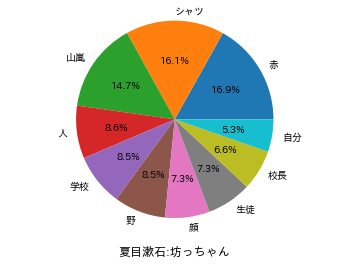

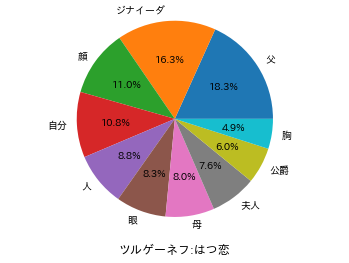

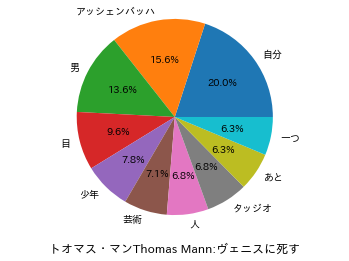

In [4]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import japanize_matplotlib


for i, count_data in enumerate(df["word_ranking"]):
    list = []

    for j in count_data:
        # 整形
        count_list = j.split(" : ")
        list.append(count_list)

    book_title = df["title"][i] + ":" + df["author"][i]
    data = []
    labels = []


    for a in list:
        labels.append(a[0])
        data.append(a[1])


    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(data, labels=labels, autopct="%1.1f%%")
    plt.title(book_title, y=-0.15)

    plt.axis("equal")
    plt.show()